In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

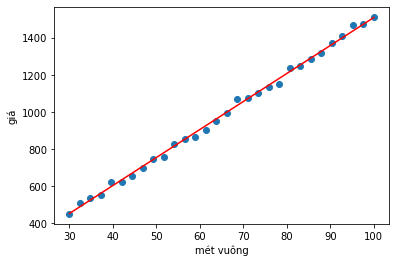

Giá nhà cho 50m^2 là :  [755.68795083]
Giá nhà cho 50m^2 là :  [1511.18116843]
Giá nhà cho 50m^2 là :  [2266.67438603]


In [2]:
data = pd.read_csv('C:/Users/quang/Downloads/data_linear.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))

predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)
x1 = 100
y1 = w[0] + w[1] * 100
print('Giá nhà cho 50m^2 là : ', y1)
x1 = 150
y1 = w[0] + w[1] * 150
print('Giá nhà cho 50m^2 là : ', y1)

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('C:/Users/quang/Downloads/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
data[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
class LinearRegression():
    def __init__(self):
        self.t = None
        
    def fit(self, x, y):
        X = np.column_stack((np.ones((x.shape[0], 1)), x))
        X_T = X.transpose()
        self.t = np.dot(np.linalg.pinv(np.dot(X_T, X)), np.dot(X_T, y))
        
    def predict(self, x):
        X = np.dot(x, self.t[1:])
        return np.sum(X + self.t[0])
    
    def coef(self):
        return self.t

In [6]:
model2 = LinearRegression()

In [7]:
data.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
x2 = np.array(data[data.columns[:-1]])

In [9]:
y2 = np.array(data['MEDV'])

In [10]:
model2.fit(x2,y2)

In [11]:
model2.coef()

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224641e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])